## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

##  Reading the dataset in frame

In [2]:
titanic = pd.read_csv('titanic.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis

### check for NAN values

In [124]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

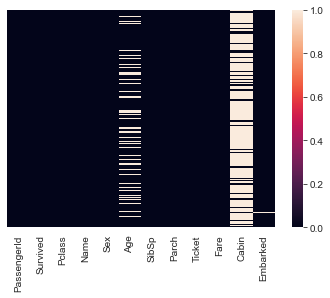

In [125]:
sns.heatmap(titanic.isnull(),xticklabels = True, yticklabels=False) #y axis are the no of total rows and column names are x axis

<AxesSubplot:xlabel='Survived', ylabel='count'>

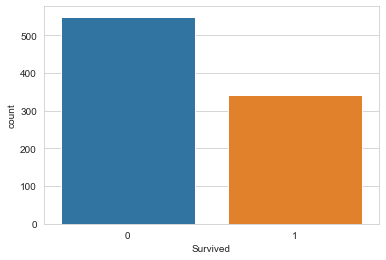

In [126]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=titanic) #to count the no of people who survived and not survived titanic

<AxesSubplot:xlabel='Survived', ylabel='count'>

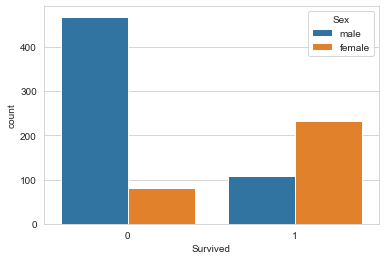

In [127]:
sns.set_style('whitegrid') #to check for male female survival
sns.countplot(x='Survived', hue='Sex', data=titanic)

<AxesSubplot:xlabel='Survived', ylabel='count'>

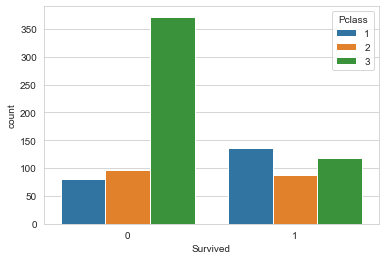

In [128]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=titanic) #to check for how many passenger classes survived or died for eg 1 stands for elite class 2 for medium class 3 for poor class

<AxesSubplot:xlabel='Age', ylabel='Count'>

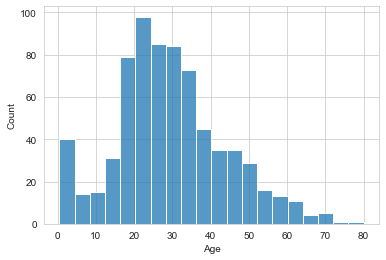

In [129]:
# to check for average age of people in the titanic  (normal distribution)
sns.histplot(titanic['Age'].dropna()) # the average age for the people are between 17 to 30  

<AxesSubplot:xlabel='SibSp', ylabel='count'>

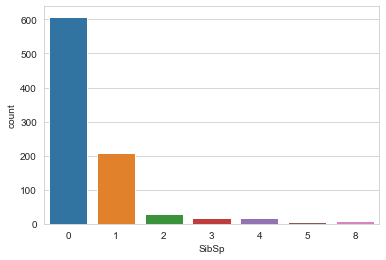

In [130]:
sns.countplot(x='SibSp', data=titanic) #to check for sibling spouse count of people

<AxesSubplot:xlabel='Fare', ylabel='Count'>

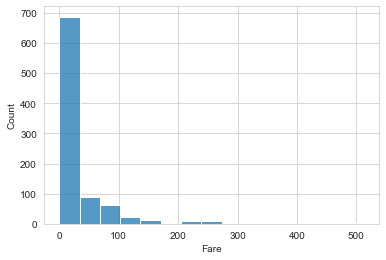

In [131]:
sns.histplot(titanic['Fare'],bins=15)

we want to fill in the missing data instead of just dropping it so one way is to fill it by taking the mean of data so thats why we check the relationship between the passenger class and age by using the boxplot

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

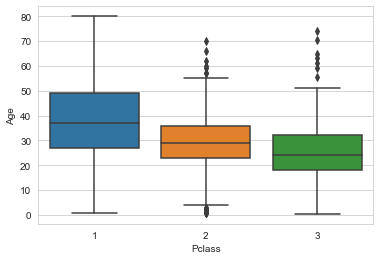

In [132]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

to replace the null values with the average values we found out through the box plot 

In [133]:
def impute_age(cols): #giving our columns
    Age = cols[0] # assign first column
    Pclass = cols[1] #assign second column
    
    if pd.isnull(Age):    # fucntion to check for null values in dataframe and that values will be replaced by 37, 29, 24 if they are found
        if Pclass == 1:
            return 37    #avg age found was 37 
        elif Pclass == 2:
            return 29    #avg age found was 29
        elif Pclass == 3:
            return 24    #avg age found was 24
    else:
        return Age  #return age when its not null
        

In [134]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1) #to apply the changes in age and Pclass and fill in the NAN values 

check heatmap again to find the null values and we can see that age column has filled values now after applying the impute function

<AxesSubplot:>

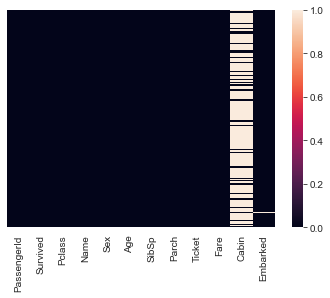

In [135]:
sns.heatmap(titanic.isnull(),xticklabels = True, yticklabels=False)

In [136]:
titanic.drop('Cabin',axis=1,inplace = True) #since it had many NAN values so we will drop this column

<AxesSubplot:>

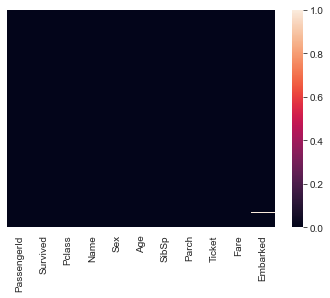

In [137]:
sns.heatmap(titanic.isnull(),xticklabels = True, yticklabels=False)

In [138]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting categorical features to dummy variables

In [139]:
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [140]:
sex = pd.get_dummies(titanic['Sex'],drop_first=True) # drop_first basically means that we are not making seperate columns for male and female representation here because our work is getting done on one column also ie 0 will be female and 1 will be male so our work is done in one column no need to make another column
sex 

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


we have made new columns of dummy variables hence we dont need the old ones so we are dropping them

In [141]:
titanic.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [142]:
titanic

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [143]:
titanic = pd.concat([titanic,sex,embark],axis=1) #combining the dummy column into the dataframe

In [144]:
titanic.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


### Train Test Split

In [145]:
X = titanic.drop('Survived',axis=1)
X #training data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1,0,1
887,888,1,19.0,0,0,30.0000,0,0,1
888,889,3,24.0,1,2,23.4500,0,0,1
889,890,1,26.0,0,0,30.0000,1,0,0


In [146]:
y = titanic['Survived']
y #testing data

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Building a Logistic Regression Model

In [149]:
from sklearn.linear_model import LogisticRegression

In [153]:
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [154]:
predictions = logmodel.predict(X_test)

In [155]:
from sklearn.metrics import *

In [156]:
accuracy = confusion_matrix(y_test,predictions)
accuracy

array([[90, 15],
       [19, 55]], dtype=int64)

In [157]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8100558659217877

In [158]:
predictions

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)